In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import train_test_split

<h1>Sample Collection<h1>

In [2]:
c_data = pd.read_csv('Data/archive/crime/23_Anti_corruprion_cases.csv')
c_data.head()

,Area_Name,Year,AC01_No_of_cases_pending_investigation_from_previous_year,AC02_No_of_cases_registered_during_the_year,AC03_Total_No_of_cases_for_investigation_during_the_year,AC04_No_of_cases_investigated_during_the_year,AC05_No_of_cases_not_investigatedor_in_which_investigation_was_dropped_due_to_any_reason_during_the_year,AC06_No_of_cases_transferred_to_local_police_during_the_year,AC07_No_of_cases_declared_false_mistake_of_fact_or_of_law_or_non_cognizable_or_civil_in_nature,AC08_No_of_cases_in_which_charge_sheets_were_laid_during_the_year,...,AC18_No_of_cases_pending_trial_from_the_previous_year,AC19_No_of_cases_sent_up_for_trial_during_the_year,AC20_Total_No_of_cases_for_trial_during_the_year,AC21_No_of_cases_withdrawn_or_other_wise_disposed_off_on_account_of_death_of_the_accused_during_the_year,AC22_No_of_cases_in_which_trials_were_completed_during_the_year,AC23_No_of_cases_convicted_during_the_year,AC24_No_of_cases_acquitted_or_discharged_during_the_year,AC25_No_of_cases_pending_trial_at_the_end_of_the_year,AC26_Percentage_of_cases_convicted_to_cases_in_which_trials_were_completed_during_the_year,AC27_Total_amount_of_fine_imposed_during_the_year_in_Rs
0,Andaman & Nicobar Islands,2001,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0.0,0
1,Andaman & Nicobar Islands,2002,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0.0,0
2,Andaman & Nicobar Islands,2003,7,3,10,9,0,1,0,1,...,2,1,3,0,0,0,0,3,0.0,0
3,Andaman & Nicobar Islands,2004,7,3,10,10,0,0,0,0,...,3,0,3,0,0,0,0,3,0.0,0
4,Andaman & Nicobar Islands,2005,10,2,12,3,0,0,2,1,...,3,1,4,0,0,0,0,4,0.0,0


In [3]:
total_c = pd.DataFrame(c_data[['Area_Name','Year', 'AC03_Total_No_of_cases_for_investigation_during_the_year']])
total_c.head()

,Area_Name,Year,AC03_Total_No_of_cases_for_investigation_during_the_year
0,Andaman & Nicobar Islands,2001,0
1,Andaman & Nicobar Islands,2002,0
2,Andaman & Nicobar Islands,2003,10
3,Andaman & Nicobar Islands,2004,10
4,Andaman & Nicobar Islands,2005,12


In [4]:
r_data = pd.read_csv('Data/archive/42_Cases_under_crime_against_women.csv')
r_data.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,...,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,5,2,3,0,0,0,...,1,3,34,36,3,3,5,0,0,39
1,Andaman & Nicobar Islands,2002,Rape,01. Rape,2,0,3,0,1,0,...,0,1,34,34,2,3,3,0,0,37
2,Andaman & Nicobar Islands,2003,Rape,01. Rape,3,0,1,0,3,0,...,1,0,29,34,2,1,6,0,0,35
3,Andaman & Nicobar Islands,2004,Rape,01. Rape,4,0,4,0,0,0,...,7,1,29,29,10,4,4,0,0,33
4,Andaman & Nicobar Islands,2005,Rape,01. Rape,3,0,8,0,1,0,...,3,7,33,29,4,8,4,0,0,37


In [5]:
total_r = pd.DataFrame(r_data[['Area_Name', 'Year', 'Total_Cases_for_Trial']])
total_r.head()

,Area_Name,Year,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,39
1,Andaman & Nicobar Islands,2002,37
2,Andaman & Nicobar Islands,2003,35
3,Andaman & Nicobar Islands,2004,33
4,Andaman & Nicobar Islands,2005,37


In [6]:
combined_df = pd.merge(total_c, total_r, on=['Area_Name', 'Year'])
combined_df.head()

,Area_Name,Year,AC03_Total_No_of_cases_for_investigation_during_the_year,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,0,39
1,Andaman & Nicobar Islands,2002,0,37
2,Andaman & Nicobar Islands,2003,10,35
3,Andaman & Nicobar Islands,2004,10,33
4,Andaman & Nicobar Islands,2005,12,37


<h1>Data Preparation<h1>

In [11]:
combined_clean=combined_df.copy()

In [12]:
combined_clean.rename(columns = {'AC03_Total_No_of_cases_for_investigation_during_the_year' : 'Corruption_cases', 'Total_Cases_for_Trial' : 'Rape_cases'}, inplace = True)
combined_clean.columns = combined_clean.columns.str.upper()
combined_clean.head()

,AREA_NAME,YEAR,CORRUPTION_CASES,RAPE_CASES
0,Andaman & Nicobar Islands,2001,0,39
1,Andaman & Nicobar Islands,2002,0,37
2,Andaman & Nicobar Islands,2003,10,35
3,Andaman & Nicobar Islands,2004,10,33
4,Andaman & Nicobar Islands,2005,12,37


In [13]:
combined_clean = combined_clean.dropna(subset=['CORRUPTION_CASES', 'RAPE_CASES'])

In [15]:
Q1 = combined_clean['RAPE_CASES'].quantile(0.25)
Q3 = combined_clean['RAPE_CASES'].quantile(0.75)
IQR = Q3 - Q1

lbound = Q1- 1.5 * IQR
ubound = Q3 + 1.5 * IQR

combined_clean = combined_clean[(combined_clean['RAPE_CASES'] >= lbound) & (combined_clean['RAPE_CASES'] <= ubound)]

In [16]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 0 to 339
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AREA_NAME         320 non-null    object
 1   YEAR              320 non-null    int64 
 2   CORRUPTION_CASES  320 non-null    int64 
 3   RAPE_CASES        320 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.5+ KB


In [17]:
corrupt = pd.DataFrame(combined_clean['CORRUPTION_CASES'])
rape = pd.DataFrame(combined_clean['RAPE_CASES'])

<h1>Exploratory Analysis & Analytic Visualisation<h1>

<h2>Uni-Variate Exploration<h2>

C:\Users\zayds\AppData\Local\Temp\ipykernel_21052\811551331.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(corrupt, kde = False, ax = axes[0,1])
C:\Users\zayds\AppData\Local\Temp\ipykernel_21052\811551331.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rape, kde = False, ax = axes[1,1])


<Axes: >

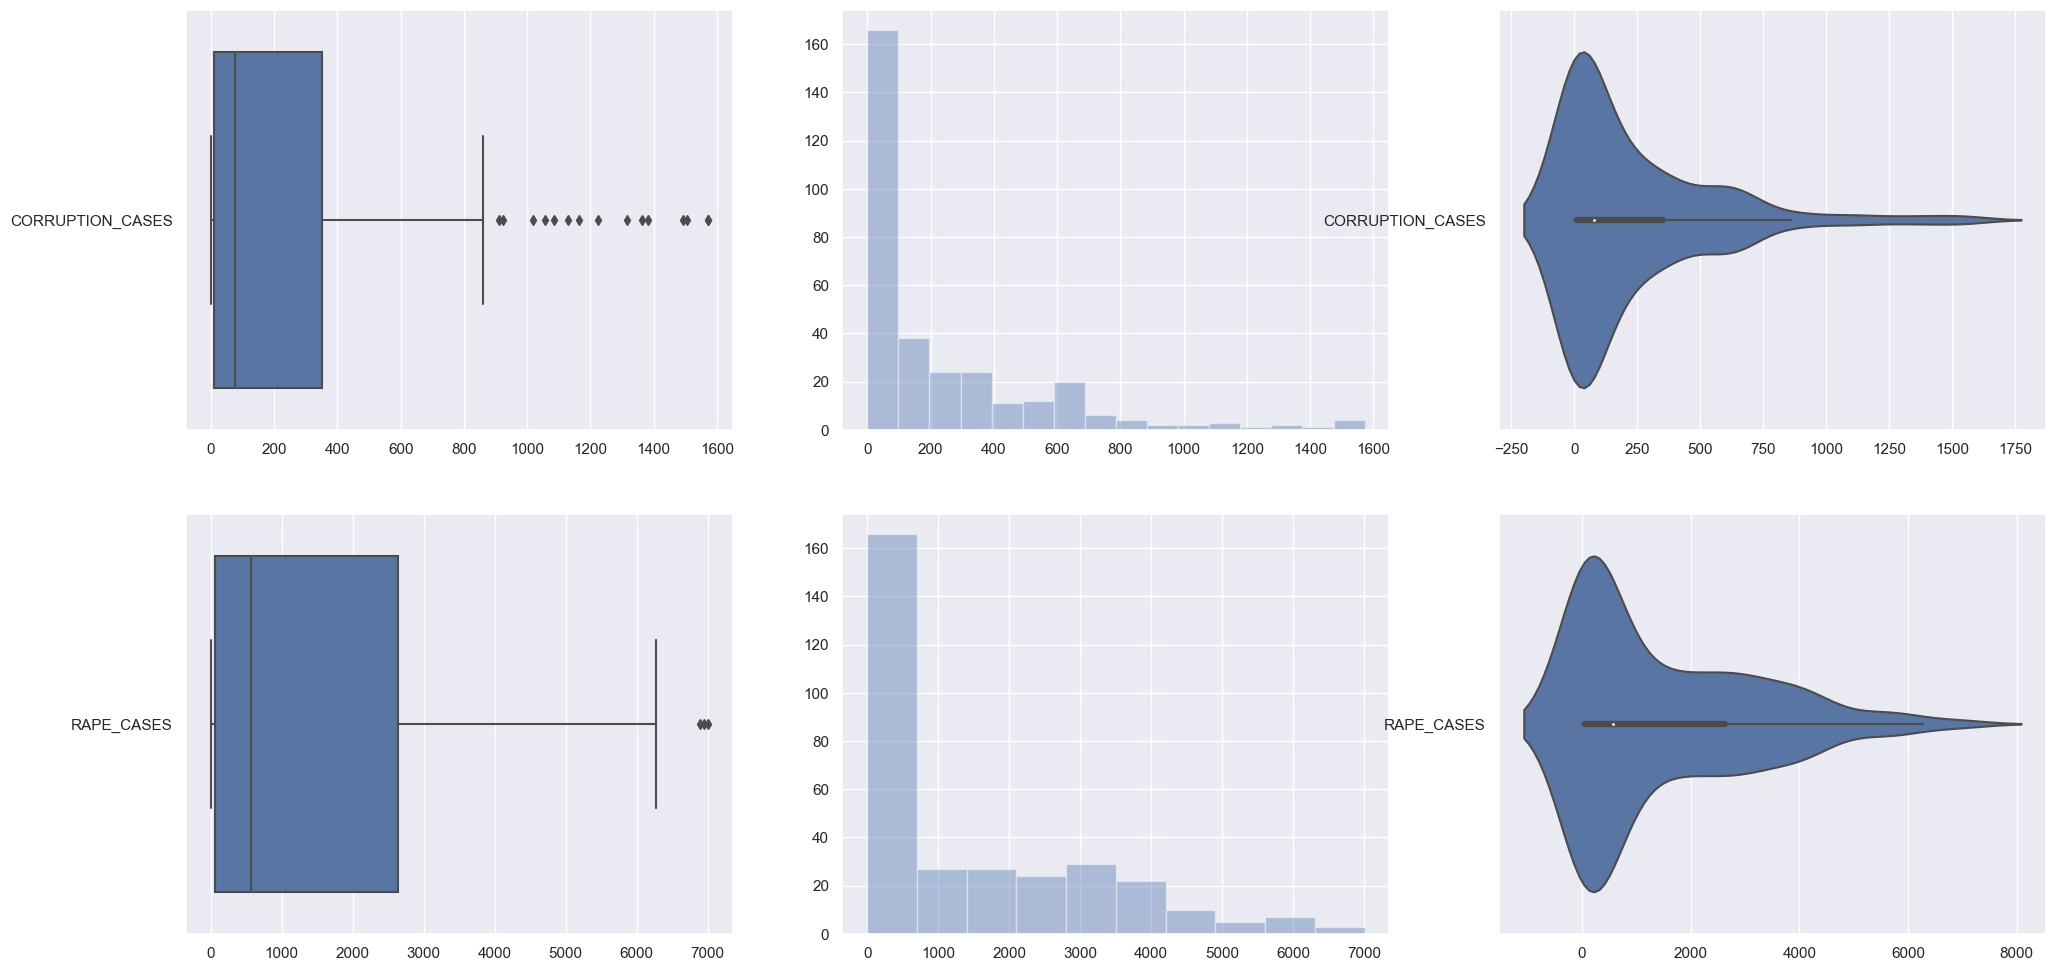

In [18]:
f, axes = plt.subplots(2, 3, figsize = (24, 12))

sb.boxplot(corrupt, orient = "h", ax = axes[0,0])
sb.distplot(corrupt, kde = False, ax = axes[0,1])
sb.violinplot(corrupt, orient = "h", ax = axes[0,2])

sb.boxplot(rape, orient = "h", ax = axes[1,0])
sb.distplot(rape, kde = False, ax = axes[1,1])
sb.violinplot(rape, orient = "h", ax = axes[1,2])

C:\Users\zayds\AppData\Local\Temp\ipykernel_21052\873028816.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  r_state = sb.catplot(x = 'AREA_NAME', y = 'RAPE_CASES', kind = 'bar', data = combined_clean, ci = None, palette = 'muted', height = 6, aspect = 2)
C:\Users\zayds\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'FacetGrid' object has no attribute 'show'

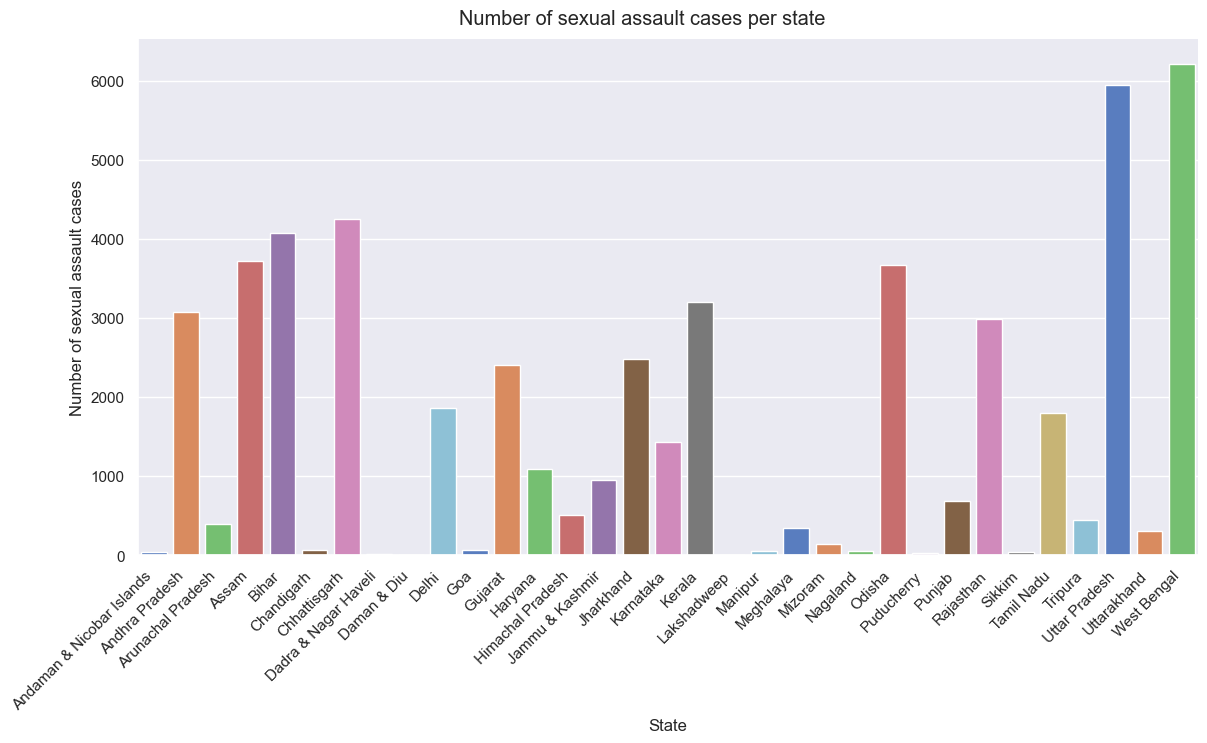

In [19]:
r_state = sb.catplot(x = 'AREA_NAME', y = 'RAPE_CASES', kind = 'bar', data = combined_clean, ci = None, palette = 'muted', height = 6, aspect = 2)
r_state.set_axis_labels("State", "Number of sexual assault cases")
r_state.fig.suptitle("Number of sexual assault cases per state", y = 1.02)
for ax in r_state.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
r_state.show()

C:\Users\zayds\AppData\Local\Temp\ipykernel_21052\3084328367.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  c_state = sb.catplot(x = 'AREA_NAME', y = 'CORRUPTION_CASES', kind = 'bar', data = combined_clean, ci = None, palette = 'muted', height = 6, aspect = 2)
C:\Users\zayds\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'FacetGrid' object has no attribute 'show'

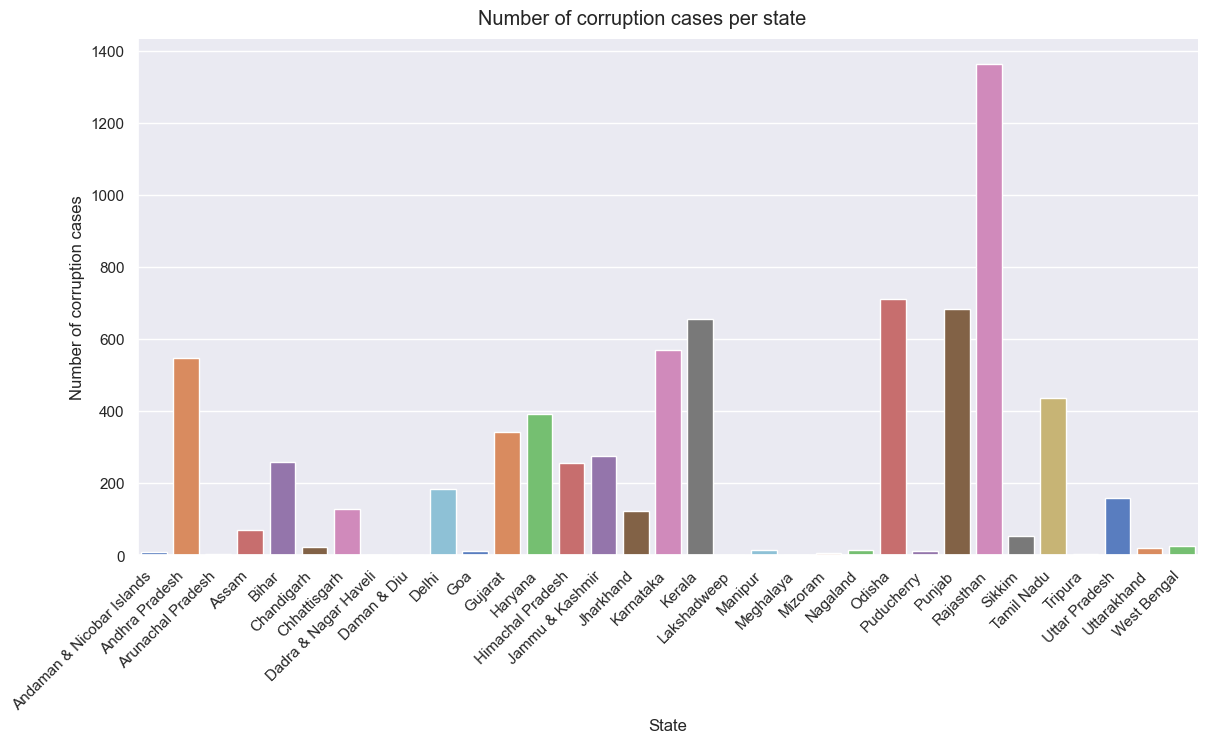

In [20]:
c_state = sb.catplot(x = 'AREA_NAME', y = 'CORRUPTION_CASES', kind = 'bar', data = combined_clean, ci = None, palette = 'muted', height = 6, aspect = 2)
c_state.set_axis_labels("State", "Number of corruption cases")
c_state.fig.suptitle("Number of corruption cases per state", y = 1.02)
for ax in c_state.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
r_state.show()

<h2>Bi-Variate Exploration<h2>

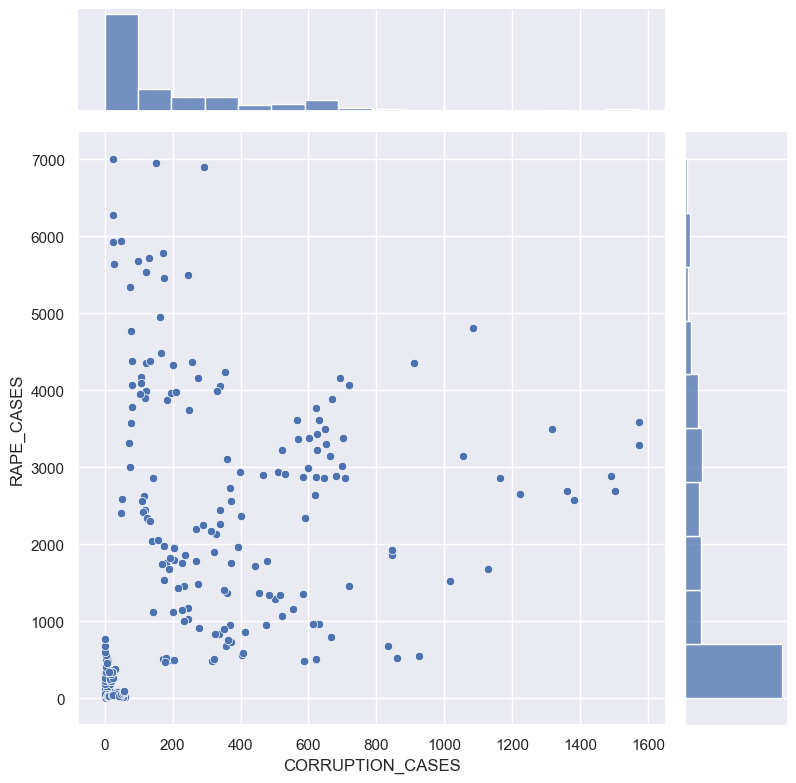

In [21]:
sb.jointplot(x=combined_clean['CORRUPTION_CASES'], y=combined_clean['RAPE_CASES'], height=8)

In [22]:
num_data = combined_clean.copy()
num_data.drop(['AREA_NAME'], axis = 1, inplace = True)
num_data.drop(['YEAR'], axis = 1, inplace = True)

In [23]:
num_data.corr()

,CORRUPTION_CASES,RAPE_CASES
CORRUPTION_CASES,1.000000,0.400837
RAPE_CASES,0.400837,1.000000


<Axes: >

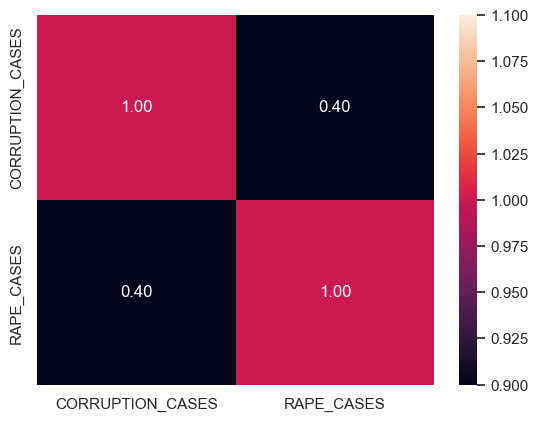

In [24]:
sb.heatmap(num_data.corr(), vmin = 1, annot = True, fmt = ".2f")

<h1>Algorithmic Optmisation<h1>

<h2>Linear Regression<h2>

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
rape_train, rape_test = train_test_split(rape, test_size=0.25)
corrupt_train, corrupt_test = train_test_split(corrupt, test_size=0.25)

In [27]:
rape_train.head()

,RAPE_CASES
269,502
308,224
9,65
52,61
312,462


In [28]:
rape_test.head()

,RAPE_CASES
324,5719
46,4235
121,859
75,11
128,1479


In [29]:
linreg = LinearRegression()

In [30]:
linreg.fit(corrupt_train, rape_train)

LinearRegression()

In [31]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [1529.45303841]
Coefficients 	: a =  [[-0.06463482]]


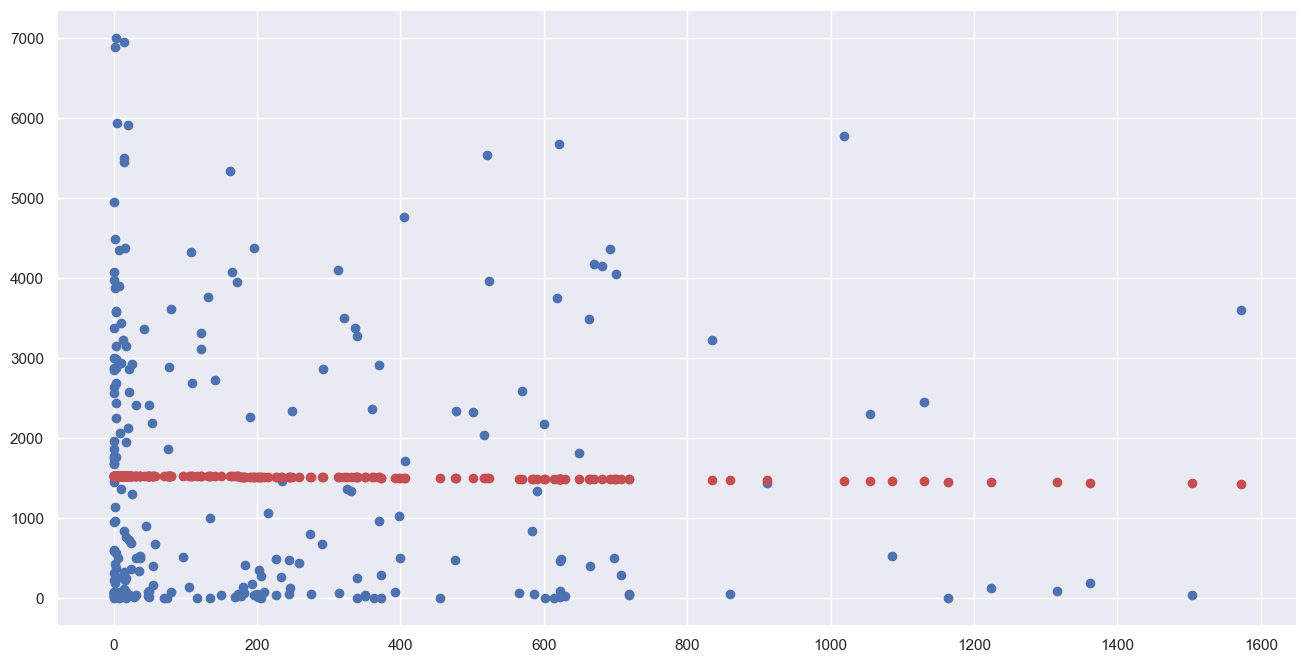

In [32]:
rape_train_pred = linreg.predict(corrupt_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_train, rape_train)
plt.scatter(corrupt_train, rape_train_pred, color = "r")
plt.show()

In [33]:
print("Explained Variance (R^2) \t:", linreg.score(corrupt_train, rape_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(rape_train, rape_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.00013555948347232505
Mean Squared Error (MSE) 	: 2960618.8236842444
Root Mean Squared Error (RMSE) 	: 1720.6448859902046


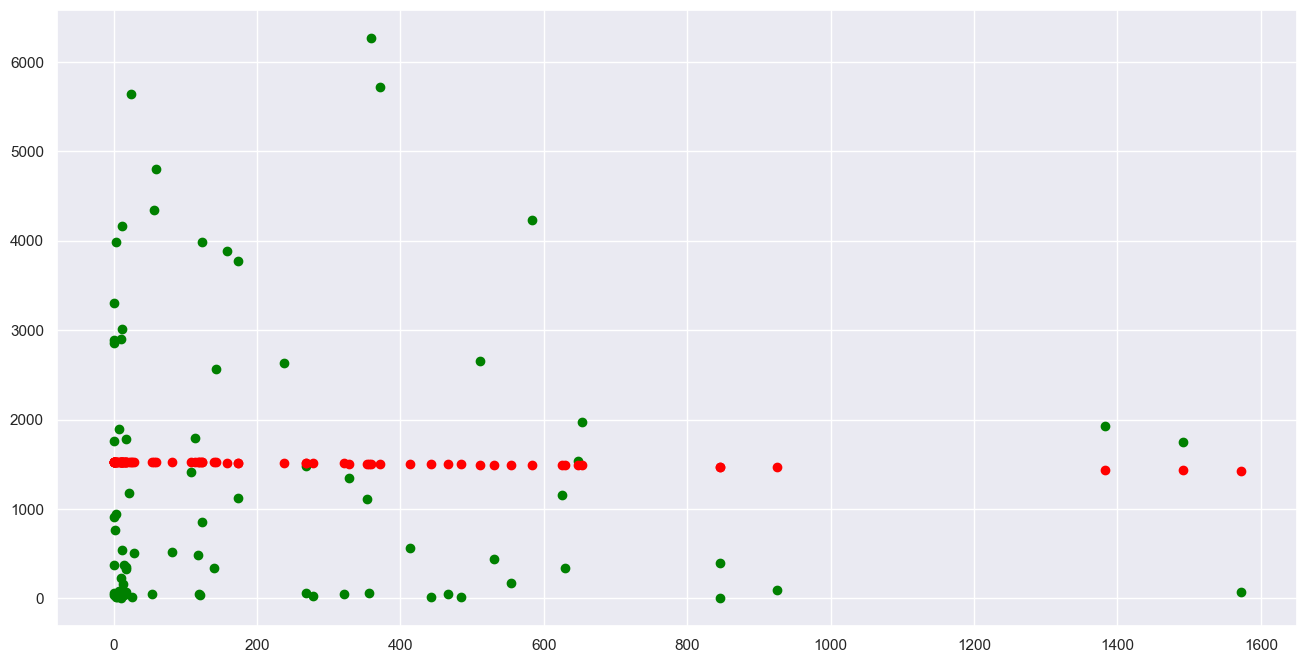

In [34]:
rape_test_pred = linreg.predict(corrupt_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_test, rape_test, color = "green")
plt.scatter(corrupt_test, rape_test_pred, color = "red")
plt.show()

In [35]:
print("Explained Variance (R^2) \t:", linreg.score(corrupt_test, rape_test))
mse = mean_sq_err(rape_test, rape_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: -0.010234144236491716
Mean Squared Error (MSE) 	: 2604659.9424534114
Root Mean Squared Error (RMSE) 	: 1613.89588959555


<h2>K-Nearest Neighbors<h2>

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)

In [38]:
knn.fit(corrupt_train, rape_train)

C:\Users\zayds\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

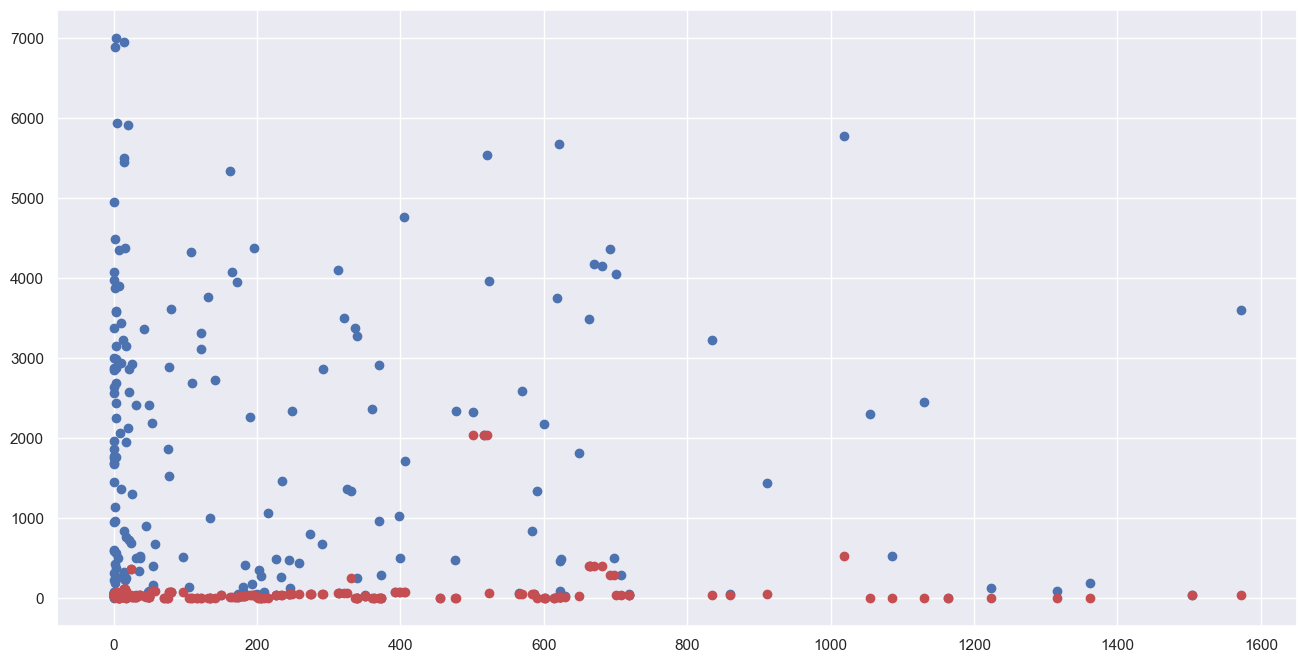

In [39]:
rape_train_pred = knn.predict(corrupt_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_train, rape_train)
plt.scatter(corrupt_train, rape_train_pred, color = "r")
plt.show()

In [40]:
print("Explained Variance (R^2) \t:", knn.score(corrupt_train, rape_train))

mse = mean_sq_err(rape_train, rape_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.175
Mean Squared Error (MSE) 	: 5110086.934027778
Root Mean Squared Error (RMSE) 	: 2260.5501396845366


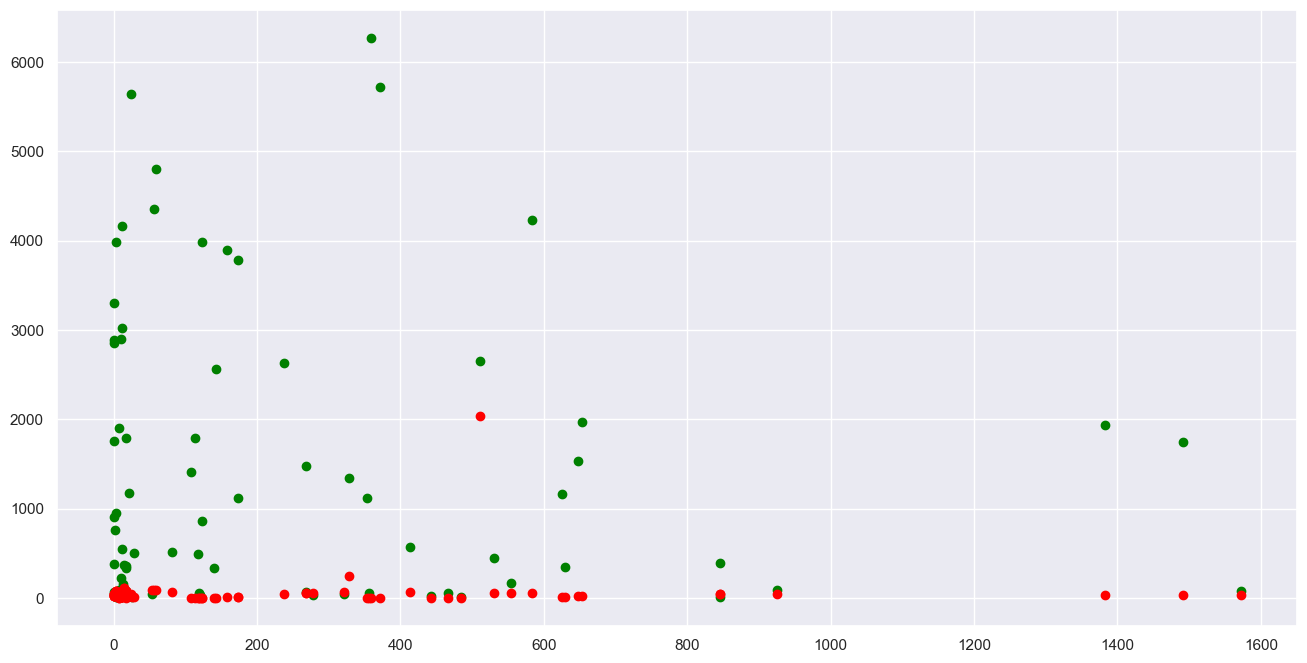

In [41]:
rape_test_pred = knn.predict(corrupt_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_test, rape_test, color = "green")
plt.scatter(corrupt_test, rape_test_pred, color = "red")
plt.show()

In [42]:
print("Explained Variance (R^2) \t:", knn.score(corrupt_test, rape_test))
mse = mean_sq_err(rape_test, rape_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.025
Mean Squared Error (MSE) 	: 4283014.266875
Root Mean Squared Error (RMSE) 	: 2069.544458781932


<h3>Neural Network<h3>

In [43]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [44]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
X_train = corrupt_train.values.reshape(-1, 1)
X_test = corrupt_test.values.reshape(-1, 1) 

In [46]:
neuralnetwork = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),  # Input layer with 10 neurons, change depending on complexity
    Dense(1)  # Output layer with 1 neuron
])

# Compile the model
neuralnetwork.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\zayds\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
neuralnetwork.fit(X_train, rape_train, epochs=100, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5948986.5000 - val_loss: 3867863.2500
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5208789.5000 - val_loss: 3855204.0000
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5325842.5000 - val_loss: 3842720.7500
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5692611.0000 - val_loss: 3830086.7500
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5492878.5000 - val_loss: 3817824.2500
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5972470.5000 - val_loss: 3805938.0000
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5202351.5000 - val_loss: 3794060.0000
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5338425.5000 - val_loss: 3782525.2500
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5177373.0000 - val_loss: 3771153.2500
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5577686.5000 - val_loss: 3760073.0000
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5911751.0000 - val_loss: 3458427.0000
Epoch 65/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4750660.5000 - val_loss: 3458497.2500
Epoch 66/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4734995.0000 - val_loss: 3458753.7500
Epoch 67/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5447983.5000 - val_loss: 3459183.0000
Epoch 68/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5040583.0000 - val_loss: 3459850.7500
Epoch 69/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4365653.0000 - val_loss: 3460593.7500
Epoch 70/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4235262.0000 - val_loss: 3461498.0000
Epoch 71/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4325921.5000 - val_loss: 3462640.2500
Epoch 72/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4303894.5000 - val_loss: 3463889.2500
Epoch 73/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4302231.0000 - val_loss: 3465272.0000
Epoch 74/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


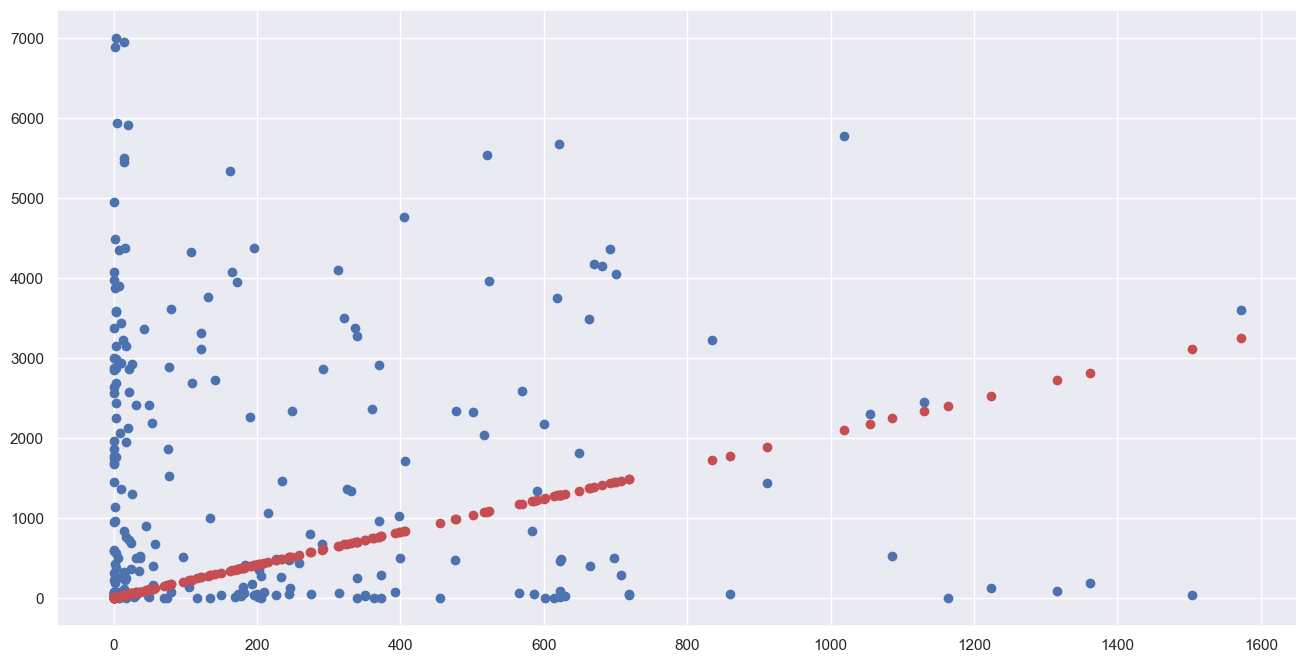

In [48]:
rape_train_pred = neuralnetwork.predict(corrupt_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_train, rape_train)
plt.scatter(corrupt_train, rape_train_pred, color = "r")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step


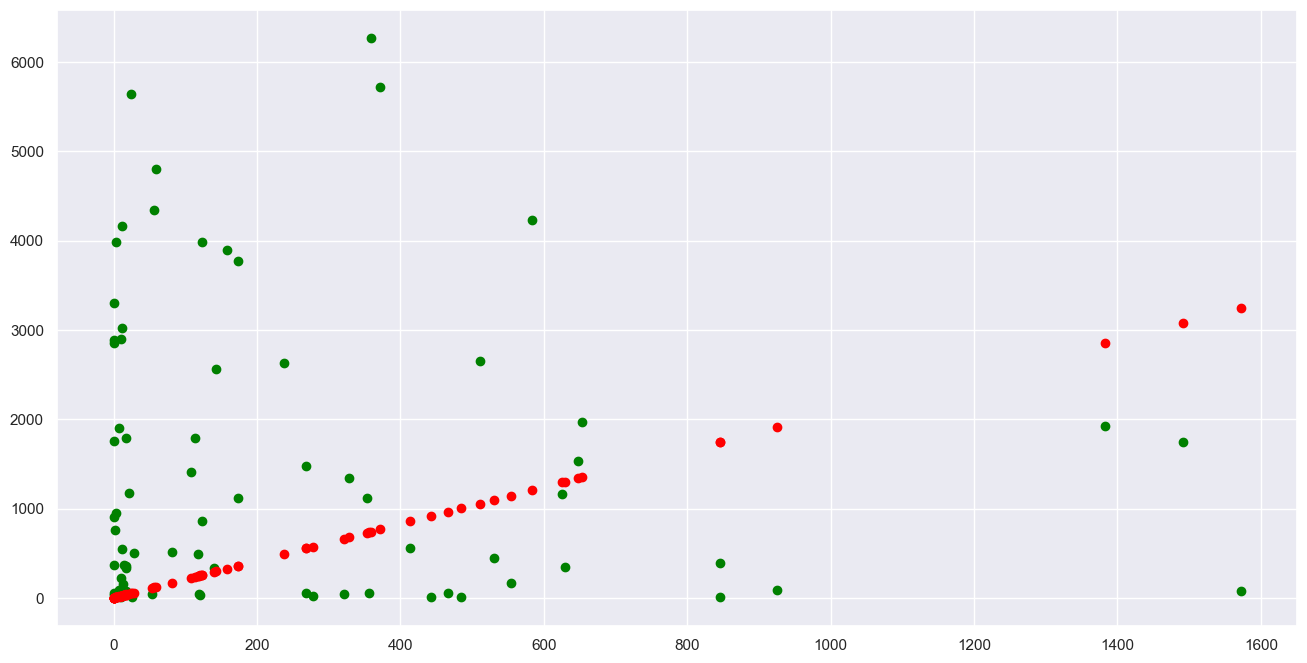

In [49]:
rape_test_pred = neuralnetwork.predict(corrupt_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_test, rape_test, color = "green")
plt.scatter(corrupt_test, rape_test_pred, color = "red")
plt.show()

<h1>Conclusion<h1>

<p>The predictor variable, which is the total number of corruption cases reported against police, and the response variable, which is the total number of sexual assault cases reported appear to have a weak correlation of 0.40, indicating a weak to moderate linear relationship. As such, the total number of corruption cases may not be a important predictor of the number of rape cases reported.
    
Three machine learning models were utilised for algorithmic optimisation. A linear regression model, a KNN model and a neural network. Each of the three machine learning models struggle with accuratley predicting the number of sexual assault cases in the test set, which is most likely due to the low correlation between the variables. Of the models, the linear regression model appears to be the most accurate, based on the distribution of the points across the graph, as well as having the lowest mean squared error of 2604659.9424534114, compared to the mean squared error of the KNN model which is 4283014.266875, or of the neural network, which is 3543156.0000.
    
Overall, the linear regression model appears to be the most accurate, however, due to the low correlation of this variable, would not reccomend using it to predict the total number of sexual assault cases<p>